In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from utils import plot_contours

plt.rcParams["text.usetex"] = True
torch.set_default_dtype(torch.double)


[-0.9994456837890556, 0.999103097530177]
[0.0, -4.3938504179477203e-10]


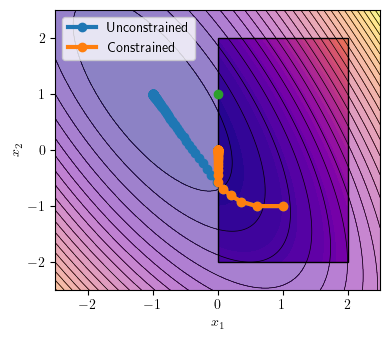

In [11]:
# Define domain
s = 2.5
x1 = torch.linspace(-s, s, steps=200)
x2 = torch.linspace(-s, s, steps=200)
x = torch.stack(torch.meshgrid(x1, x2, indexing="xy"), dim=2)

# Define function
def f(x):
    # Define constants
    xt = torch.tensor([-1.0, 1.0])
    Q = torch.tensor([[2.0, 1.0], [1.0, 1.0]])
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)


def simple_decent(x_init, func, eta=0.1, max_iter=100):
    x = x_init.clone().requires_grad_()
    points = []
    for _ in range(max_iter):
        points.append([xi.item() for xi in x])
        grad = torch.autograd.grad(func(x).sum(), x)[0]
        x.data -= eta * grad
    return points


def box_constrained_decent(x_init, func, x_lower, x_upper, eta=0.1, max_iter=100):
    x = x_init.clone().requires_grad_()

    points = []
    for _ in range(max_iter):
        points.append([xi.item() for xi in x])
        grad = torch.autograd.grad(func(x).sum(), x)[0]
        x.data -= eta * grad
        x.data = torch.max(torch.min(x.data, x_upper), x_lower)
    return points


x_init = torch.tensor([1.0, -1.0])
x_lower = torch.tensor([0.0, -2.0])
x_upper = torch.tensor([2.0, 2.0])
path = simple_decent(x_init, f)
path_pg = box_constrained_decent(x_init, f, x_lower, x_upper)
print(path[-1])
print(path_pg[-1])

plot_contours(
    x[..., 0],
    x[..., 1],
    f(x),
    figsize=(4.0, 3.5),
    box=[x_lower, x_upper],
    paths={"Unconstrained": path, "Constrained": path_pg},
)
plt.plot([0], [1], marker="o", color="tab:green")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/box_example.pdf", transparent=True)
plt.show()


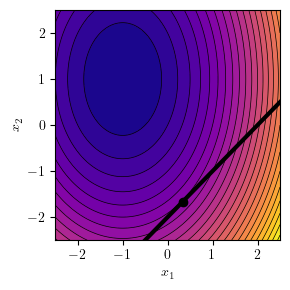

In [12]:
h = lambda x: x - 2

# Define function
def f(x):
    # Define constants
    xt = torch.tensor([-1.0, 1.0])
    Q = torch.tensor([[2.0, 0.0], [0.0, 1.0]])
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)

plot_contours(x[..., 0], x[..., 1], f(x), figsize=(3.0, 3.0))
plt.plot(x1, h(x1), "k", linewidth=3)
plt.plot([1 / 3], [-5 / 3], marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/lagrange_example.pdf", transparent=True)
plt.show()


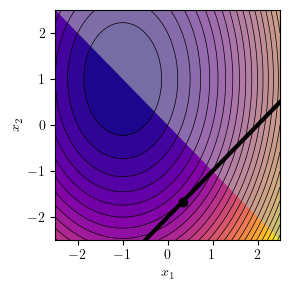

In [13]:
g = lambda x: -x
plot_contours(x[..., 0], x[..., 1], f(x), figsize=(3.0, 3.0))
plt.plot(x1, h(x1), "k", linewidth=3)
plt.fill_between(x1, 5, g(x1), color=(0.7, 0.7, 0.7, 0.6), linewidth=0)
plt.plot([1 / 3], [-5 / 3], marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/kkt_example_1.pdf", transparent=True)
plt.show()


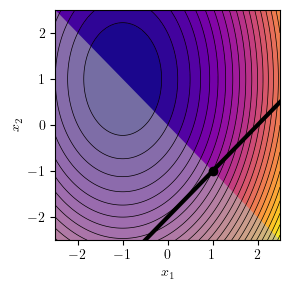

In [14]:
plot_contours(x[..., 0], x[..., 1], f(x), figsize=(3.0, 3.0))
plt.plot(x1, h(x1), "k", linewidth=3)
plt.fill_between(x1, -5, g(x1), color=(0.7, 0.7, 0.7, 0.6), linewidth=0)
plt.plot([1], [-1], marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/kkt_example_2.pdf", transparent=True)
plt.show()


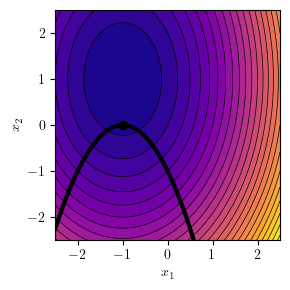

In [15]:
i = lambda x: -((x + 1) ** 2)

lbd_star = 2
x_star = -1
y_star = 1 - 1 / 2 * lbd_star

plot_contours(x[..., 0], x[..., 1], f(x), figsize=(3.0, 3.0))
plt.plot(x1, i(x1), "k", linewidth=3)
plt.plot([x_star], [y_star], marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/dual_example.pdf", transparent=True)
plt.show()


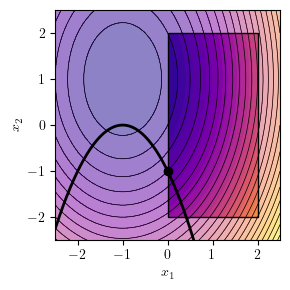

In [16]:
i = lambda x: -((x + 1) ** 2)


plot_contours(x[..., 0], x[..., 1], f(x), box=[x_lower, x_upper], figsize=(3.0, 3.0))
plt.plot(x1, i(x1), "k", linewidth=2)
plt.plot([0], [-1], marker="o", color="k")
plt.xlim([-s, s])
plt.ylim([-s, s])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.savefig("figures/separable_example.pdf", transparent=True)
plt.show()


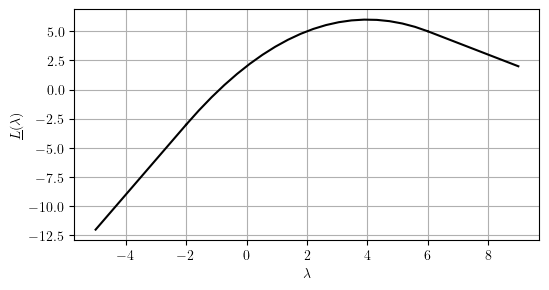

In [17]:
l_1 = np.linspace(-5, -2, 10)
l_2 = np.linspace(-2, 6, 20)
l_3 = np.linspace(6, 9, 10)
f_1 = 3 + 3 * l_1
f_2 = 2 + 2 * l_2 - l_2**2 / 4
f_3 = 11 - l_3

fig = plt.figure(figsize=(6, 3))
plt.plot(l_1, f_1, "k")
plt.plot(l_2, f_2, "k")
plt.plot(l_3, f_3, "k")
plt.xlabel("$\lambda$")
plt.ylabel("$\\underline{L}(\\lambda)$")
plt.grid()
plt.savefig("figures/dual_function.pdf", transparent=True)
plt.show()


In [18]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


# def saddle_function(x, y):
#     return x**2 - y**2

# x = np.linspace(-1, 1, 100)
# y = np.linspace(-1, 1, 100)
# xx, yy = np.meshgrid(x, y)
# z = saddle_function(xx, yy)

# fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "surface"}]])
# fig.add_trace(go.Contour(z=z, x=x, y=y, ncontours=25), row=1, col=1)
# fig.add_trace(go.Surface(z=z, x=xx, y=yy), row=1, col=2)
# fig.update_traces(showscale=False)
# fig.update_layout(autosize=False, width=1000, height=500)
# fig.show()
